In [26]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import pickle
pd.set_option('display.max_columns', None)
import pickle
import math
from scipy import stats
from datetime import datetime

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)

#normalización
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#estandarización 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#encoders
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

#metrics
from sklearn import metrics

#modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#scr
import sys
sys.path.append("../")
import src.support as sp

# input

In [27]:
df = pd.read_csv('../data/train.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


# EDA
1. ver que tengo en el df y los tipos 

_________________________________

1_Estructura de los datos: (40455, 11)


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


None

_________________________________

2_Número de filas duplicadas:
0
_________________________________



,nulos,dtypes
id,0,int64
carat,0,float64
cut,0,object
color,0,object
clarity,0,object
depth,0,float64
table,0,float64
x,0,float64
y,0,float64
z,0,float64


_________________________________

3_Descripción de las variables tipo Numéricas:


,count,mean,std,min,25%,50%,75%,max
id,40455.0,20227.000000,11678.496907,0.000,10113.500,20227.00,30340.500,40454.000
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


_________________________________

4_Descripción de las variables tipo Categóricas:


,count,unique,top,freq
cut,40455,5,Ideal,16230
color,40455,7,G,8410
clarity,40455,8,SI1,9779


_________________________________

5_Distribución variables pairplot:
_________________________________



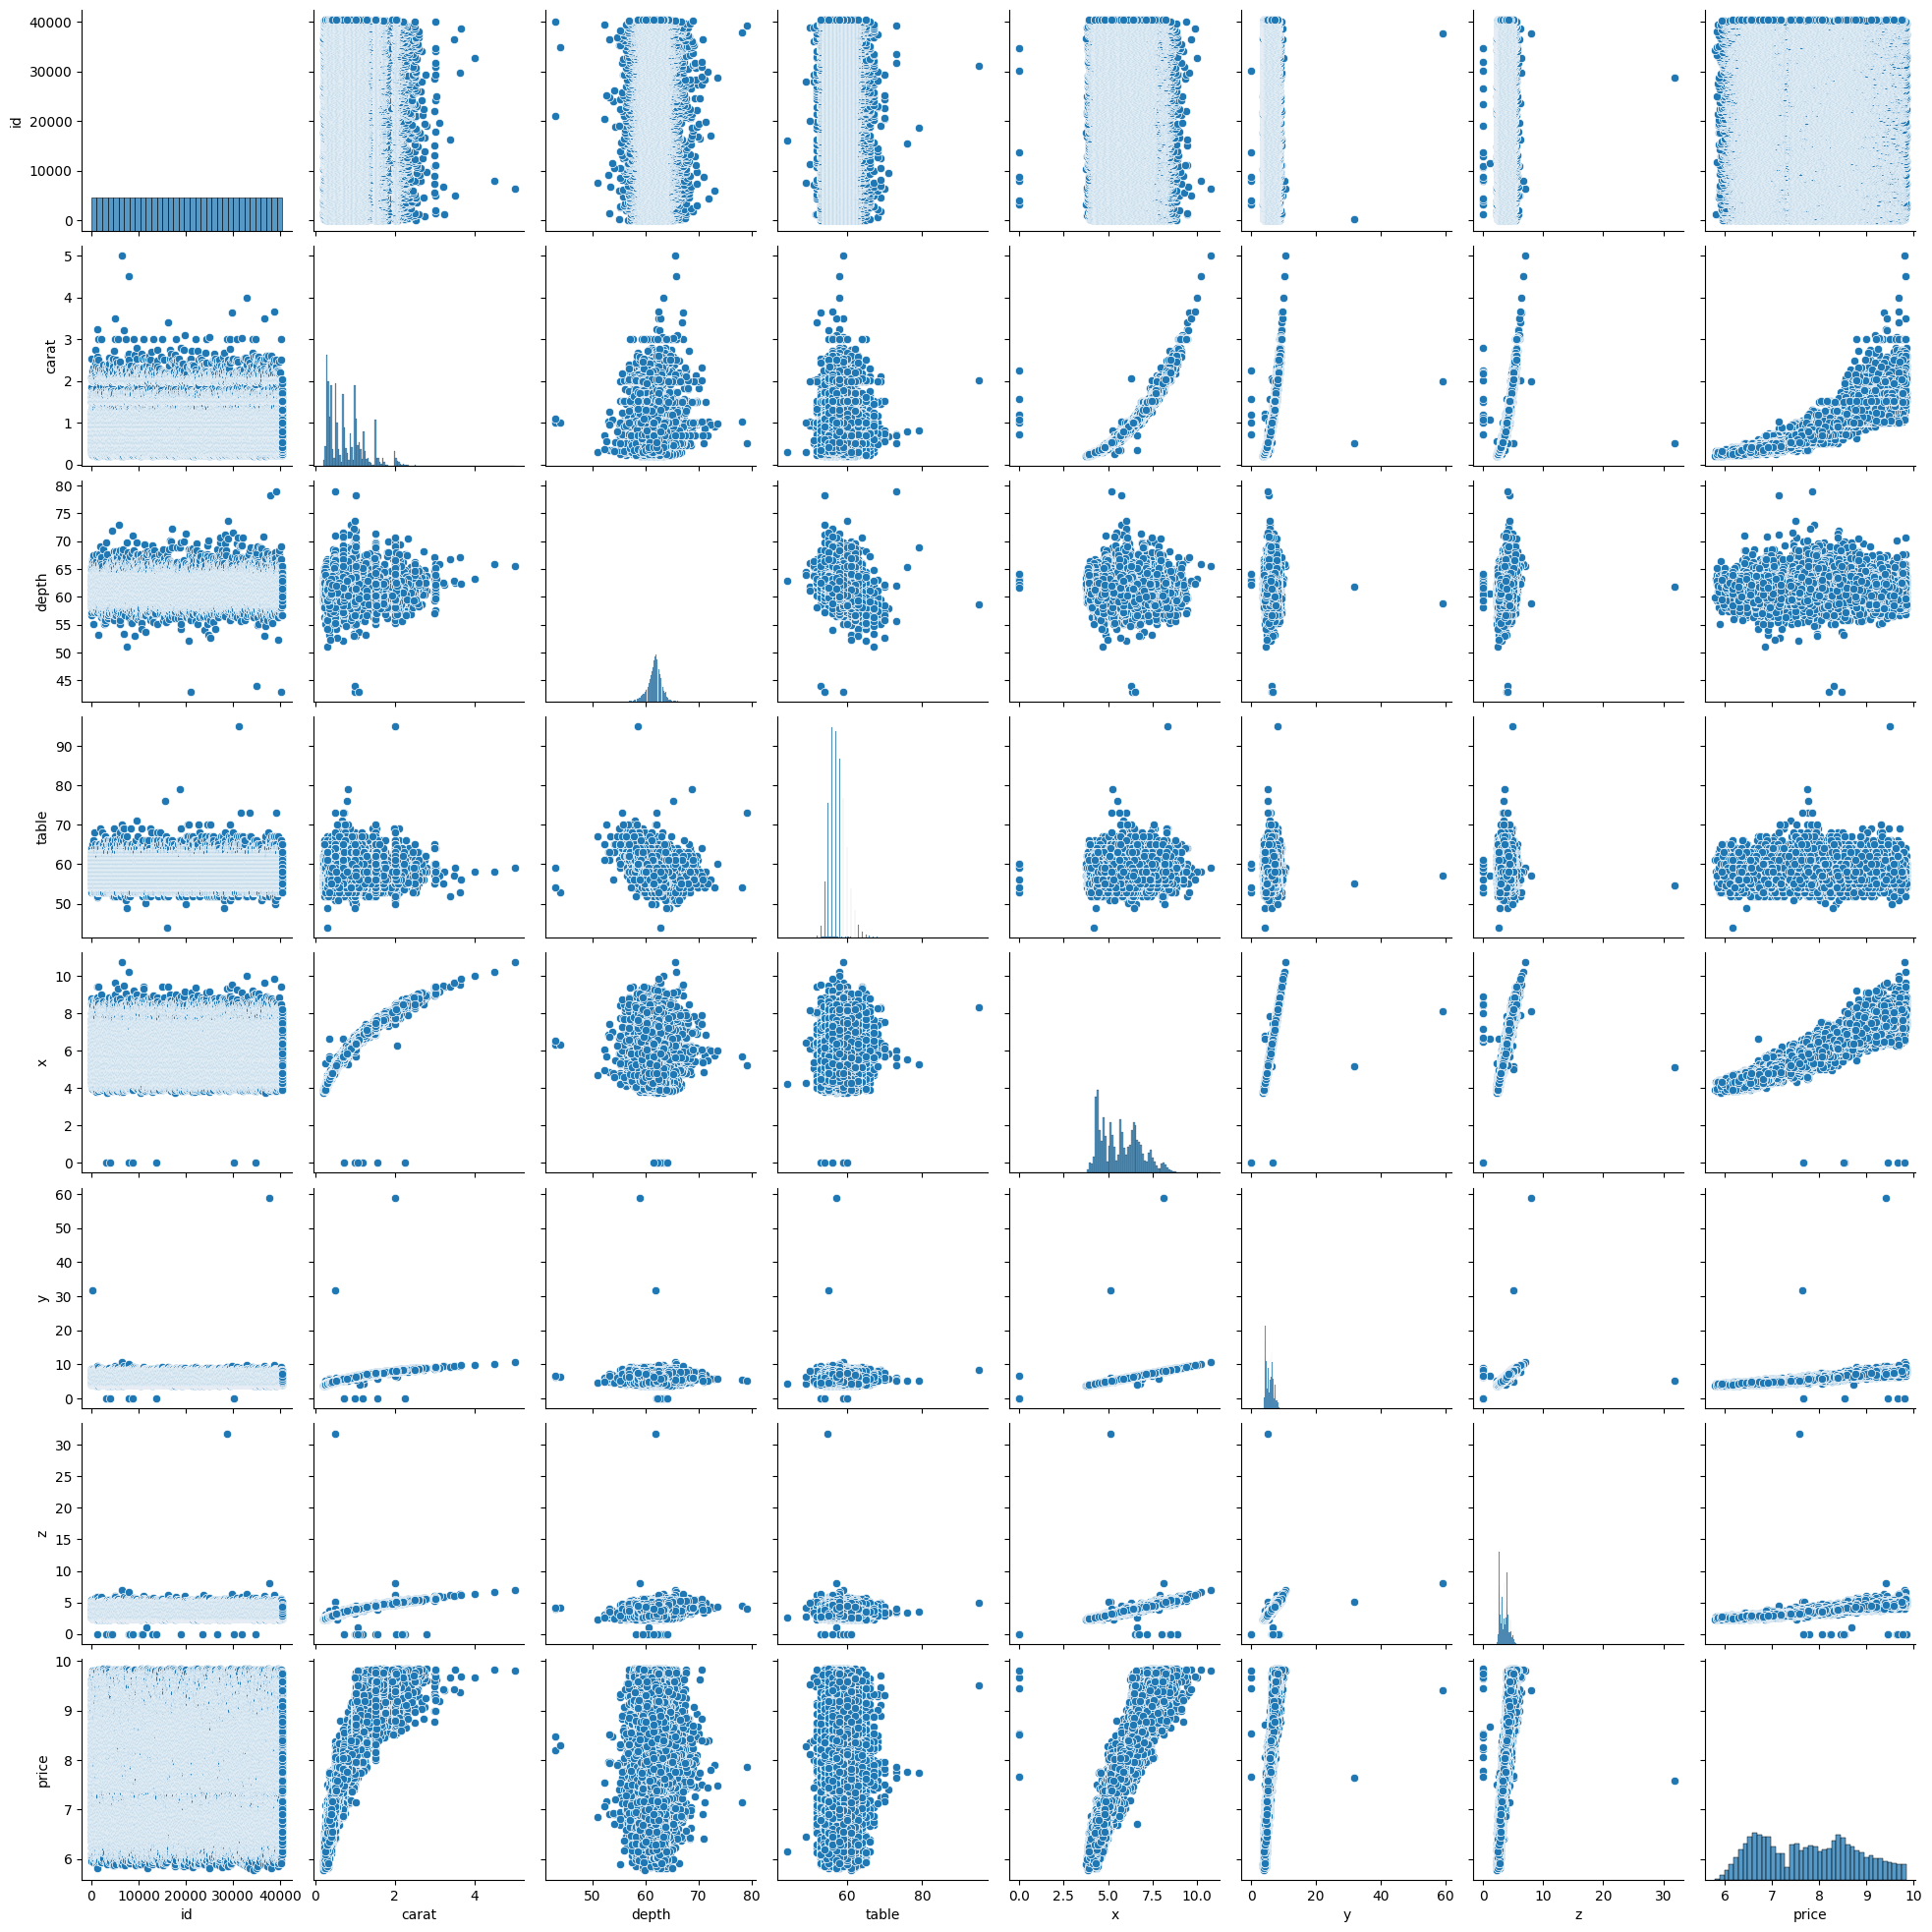

In [28]:
sp.analisis_basico(df)

**variables:**
- `id`: only for test & sample submission files, id for prediction sample identification
- `price`: price in USD
- `carat`: weight of the diamond
- `cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- `color`: diamond colour
- `clarity`: a measurement of how clear the diamond is
- `x`: length in mm
- `y`: width in mm
- `z`: depth in mm
- `depth`: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- `table`: width of top of diamond relative to widest point (43--95)

las variables `x`, `y`, `z` están relacionadas con `depth` y `table`, por lo que las podemos eliminar. 

las variables que quedan en el dataset serían las sigueintes:
- variable respuesta:
    - `price`
- variables numéricas:
    - `carat`
    - `depth`
    - `table`
- variables categóricas:
    - `clarity`
    - `cut`
    - `color`

## variable respuesta

<AxesSubplot: xlabel='price', ylabel='Count'>

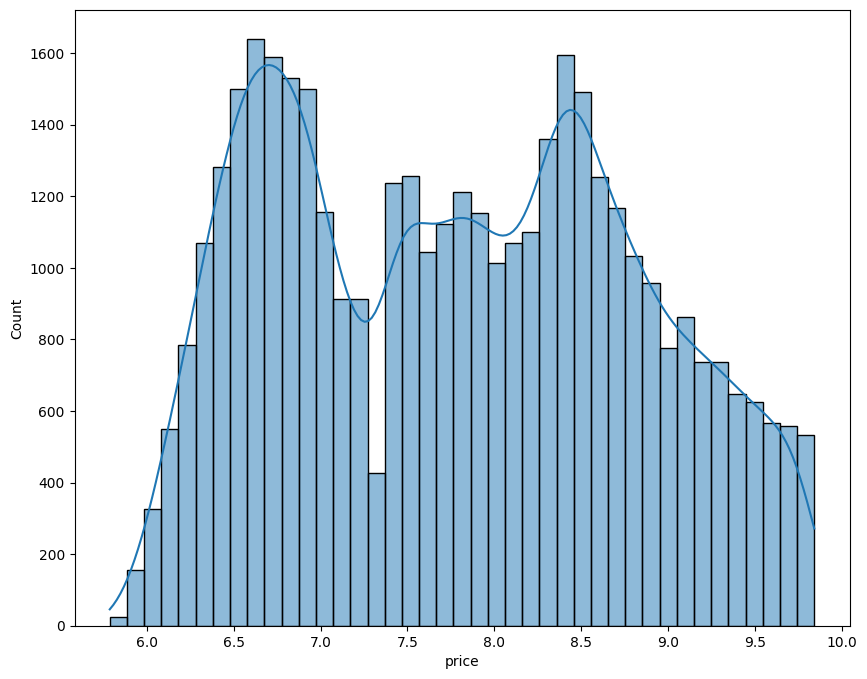

In [29]:
# cuantas casas tienen de media el valor que indica el eje x
sns.histplot(data = df, x = 'price', kde = True)

mirando la cariable respuesta, no es normal.

## variables predictoras
### variables numéricas

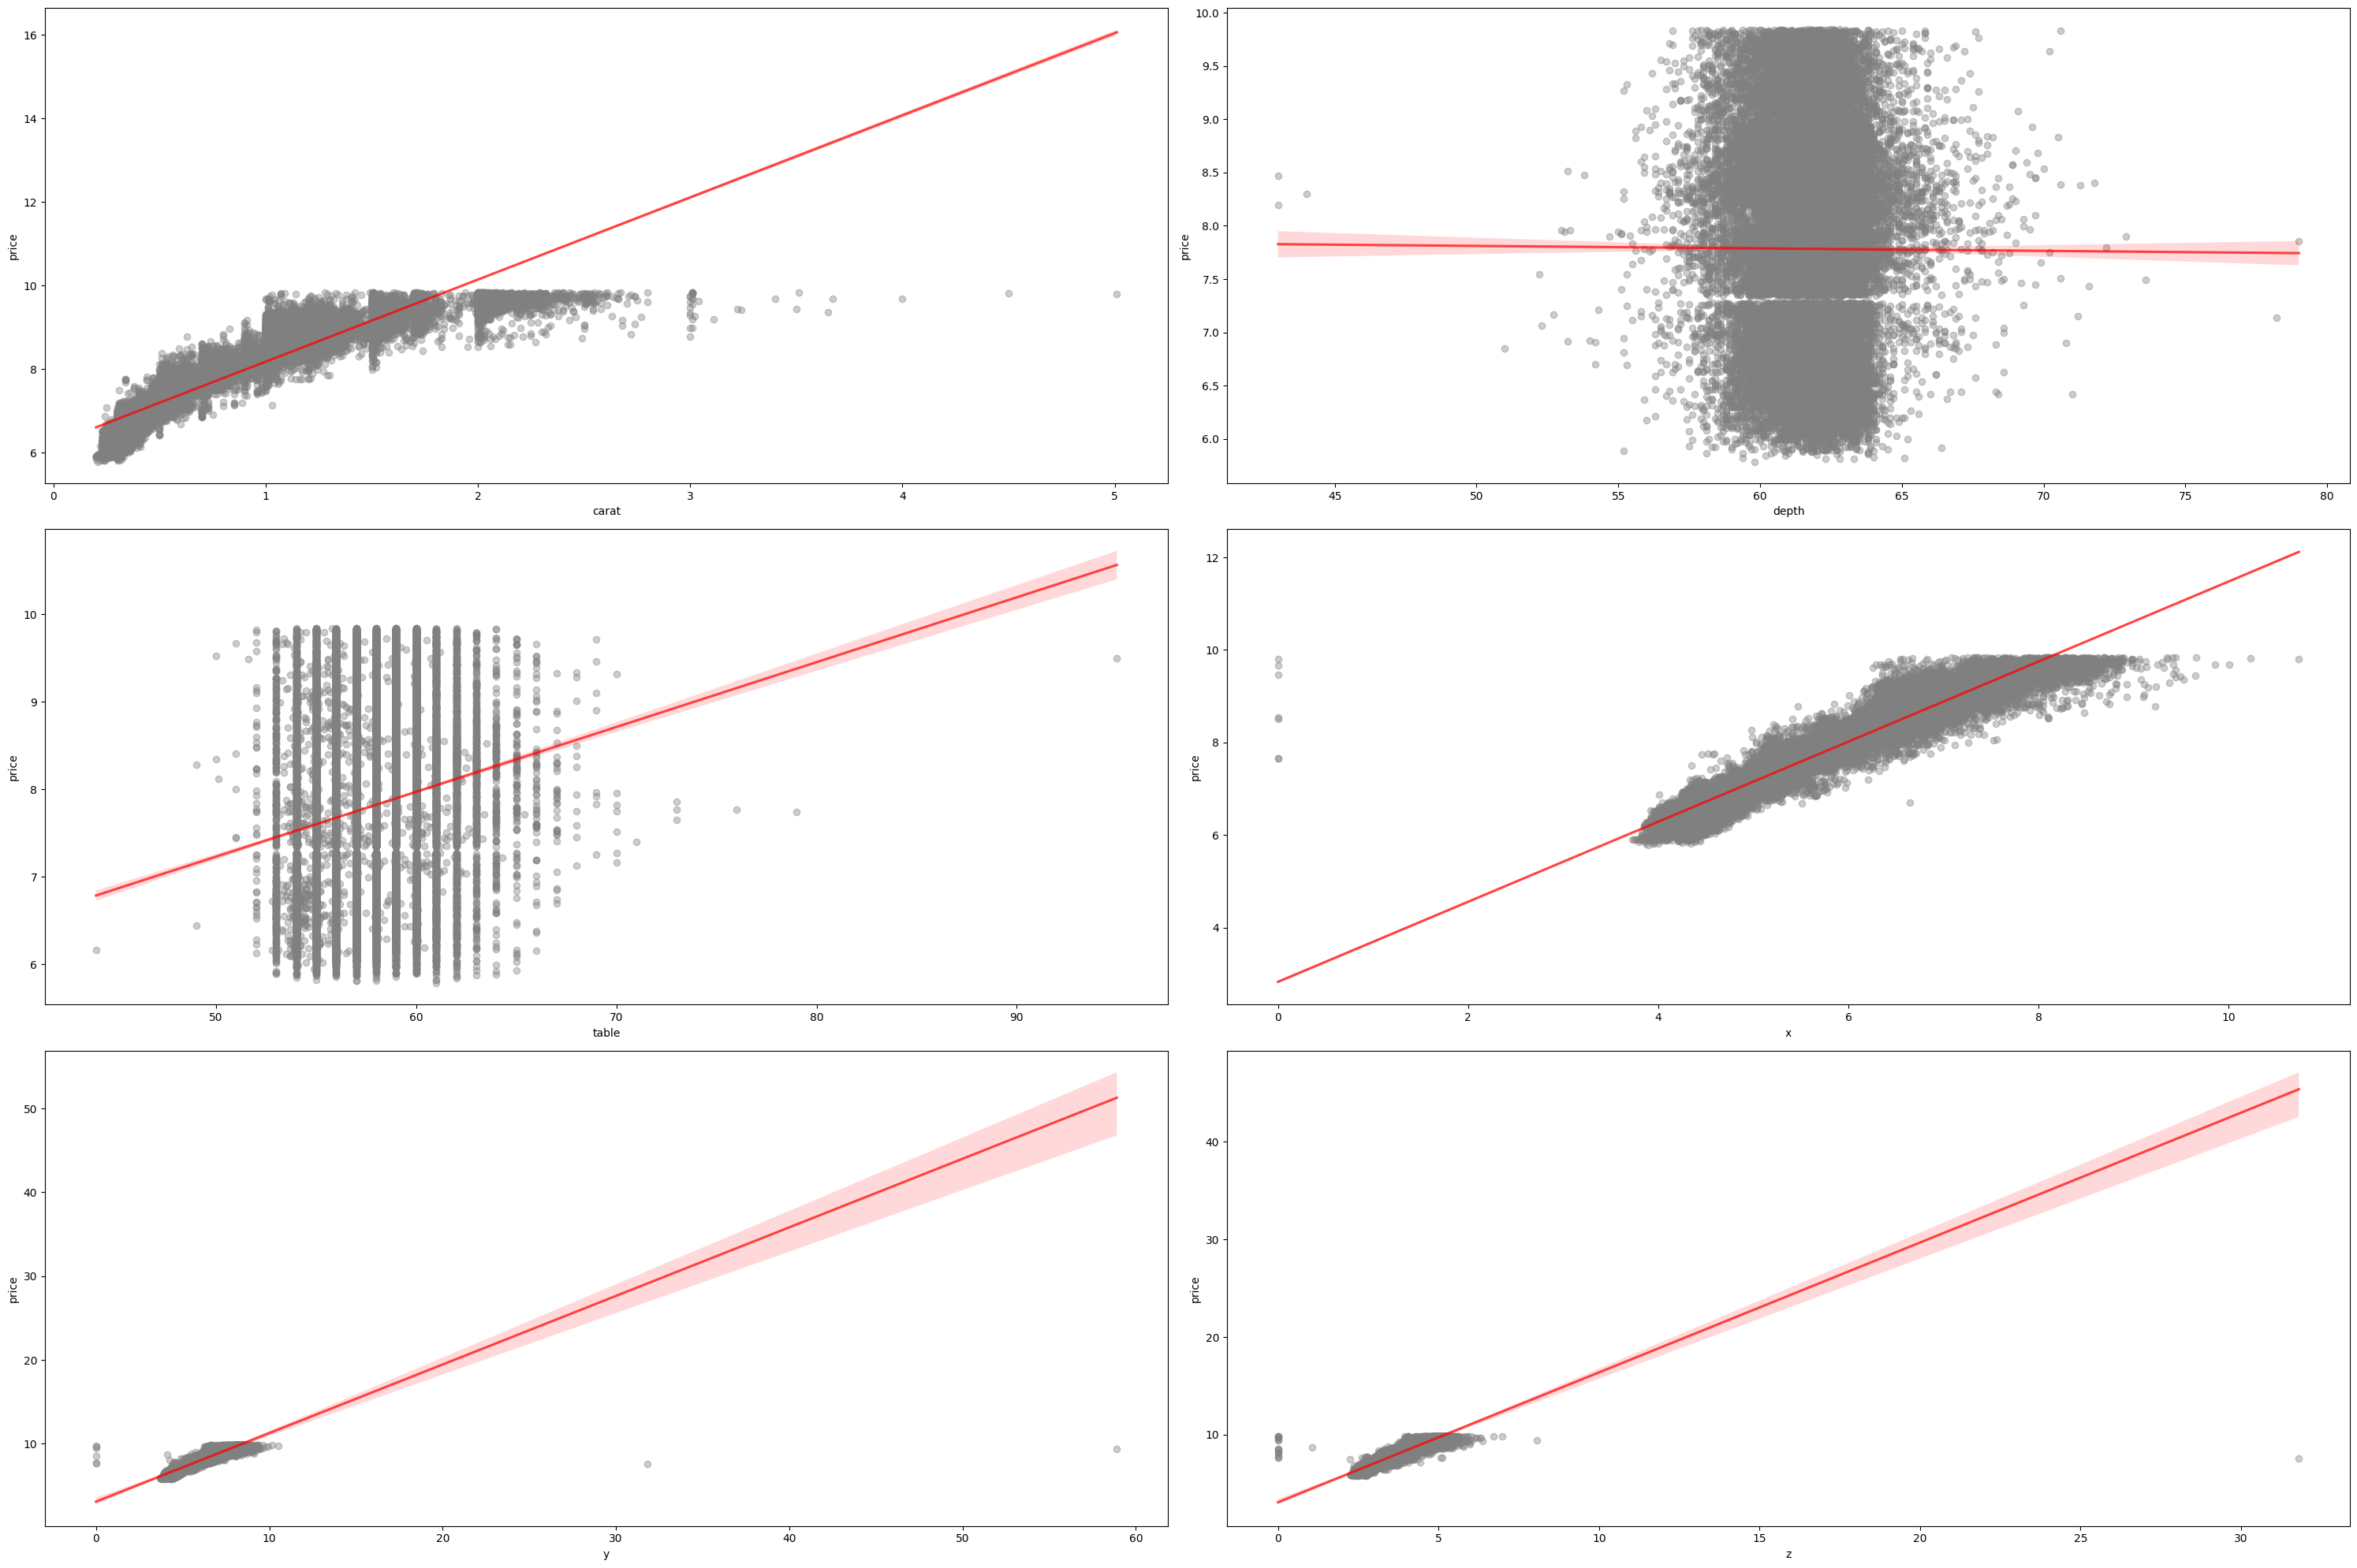

In [30]:
sp.regplot_numericas(df, ['id', 'price'], 'price')

la única que está verdaderamente relacionada con el precio es `carat`. Lo revisaremos con el heatmap para ver la correlación

## correlación de las variables

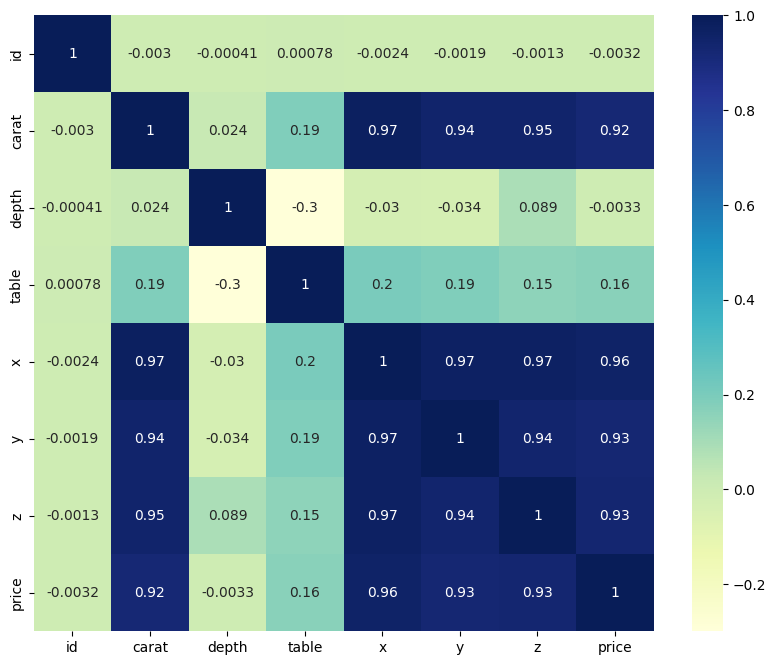

In [31]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu",
           annot = True);

## variables categóricas

3


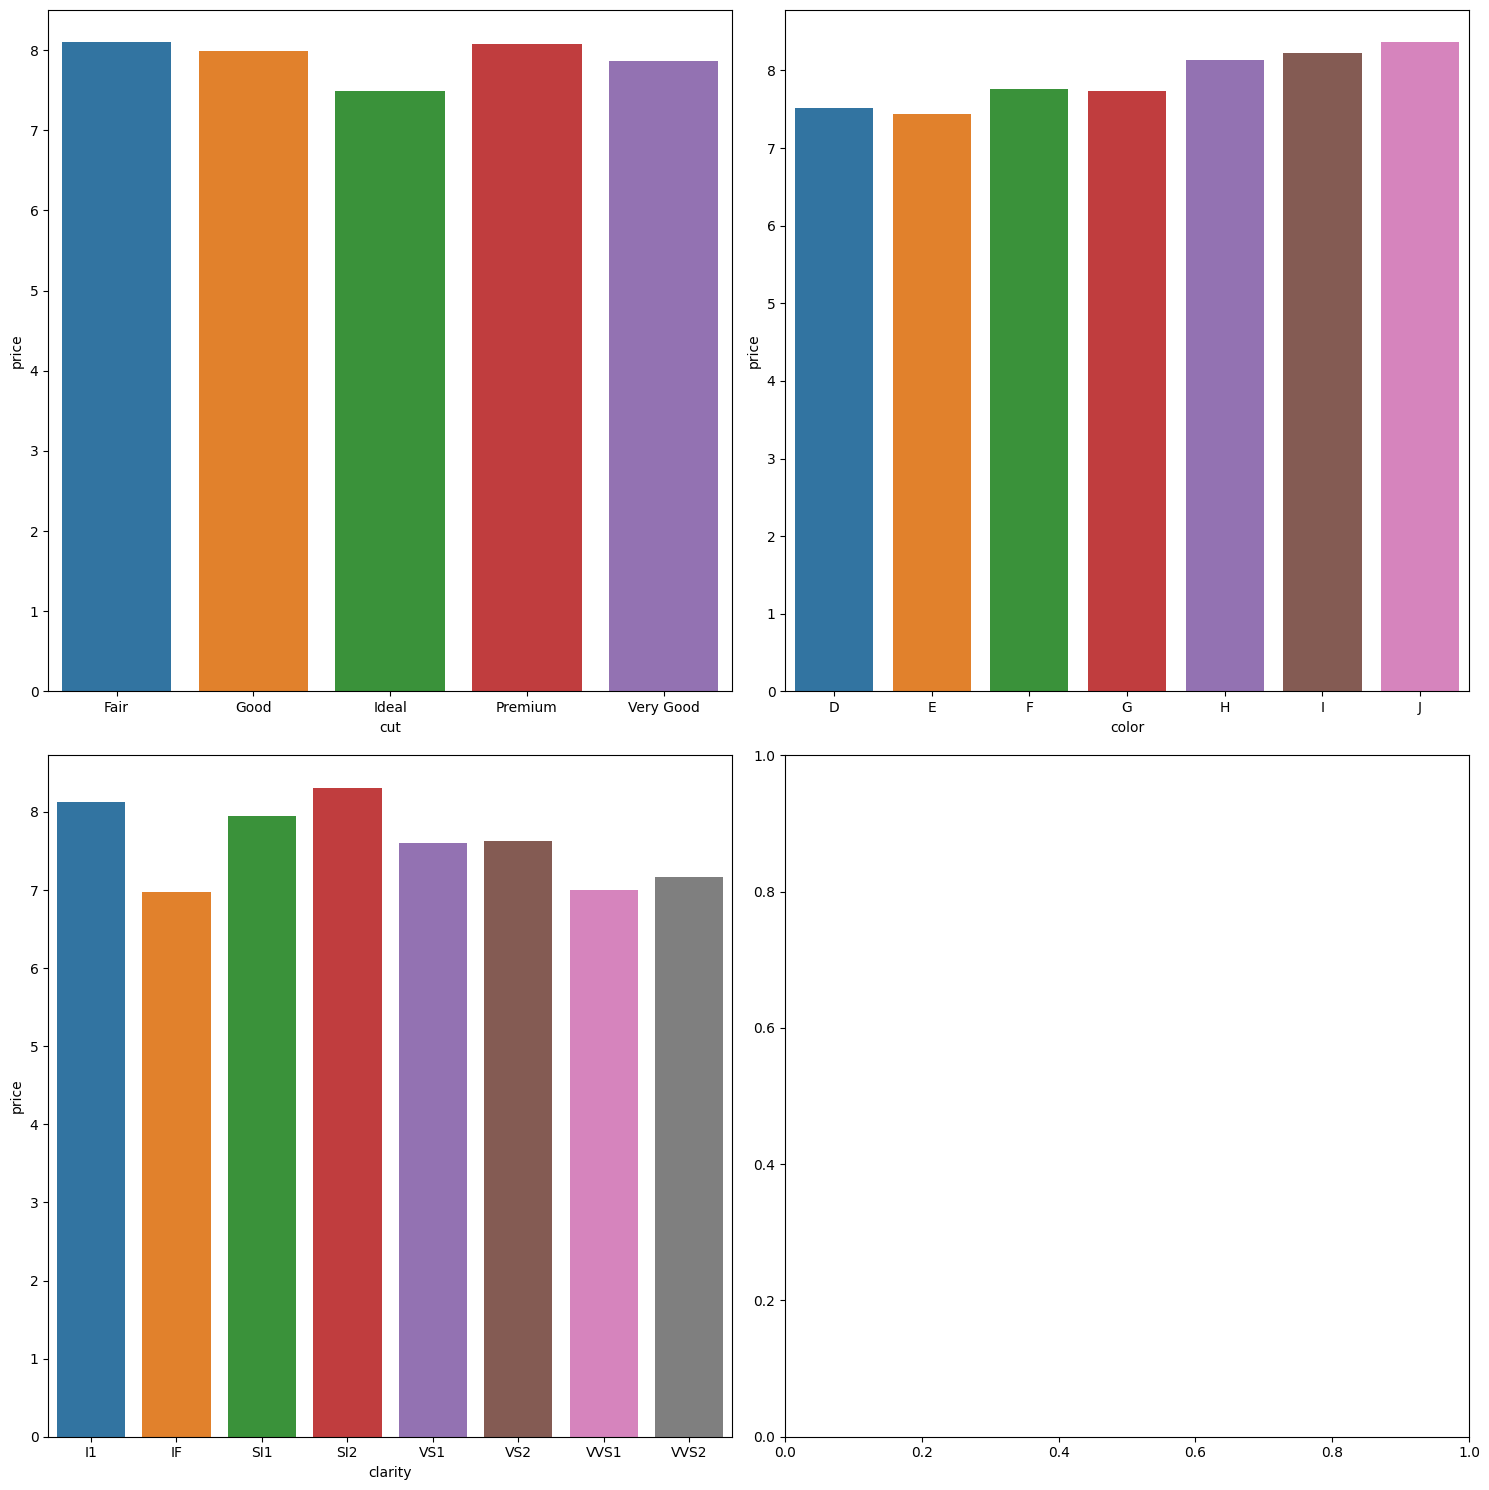

In [32]:
sp.chart_categoricas(df, 'price')

las variables categóricas vemos que no parecen tener orden.

# gestión de nulos

no hay nulos en este dataframe, por lo que pasamos al siguiente apartado.

In [33]:
# Número de datos nulos por columna

df.isnull().sum() / df.shape[0]

id         0.0
carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
x          0.0
y          0.0
z          0.0
price      0.0
dtype: float64

# gestión de outliers

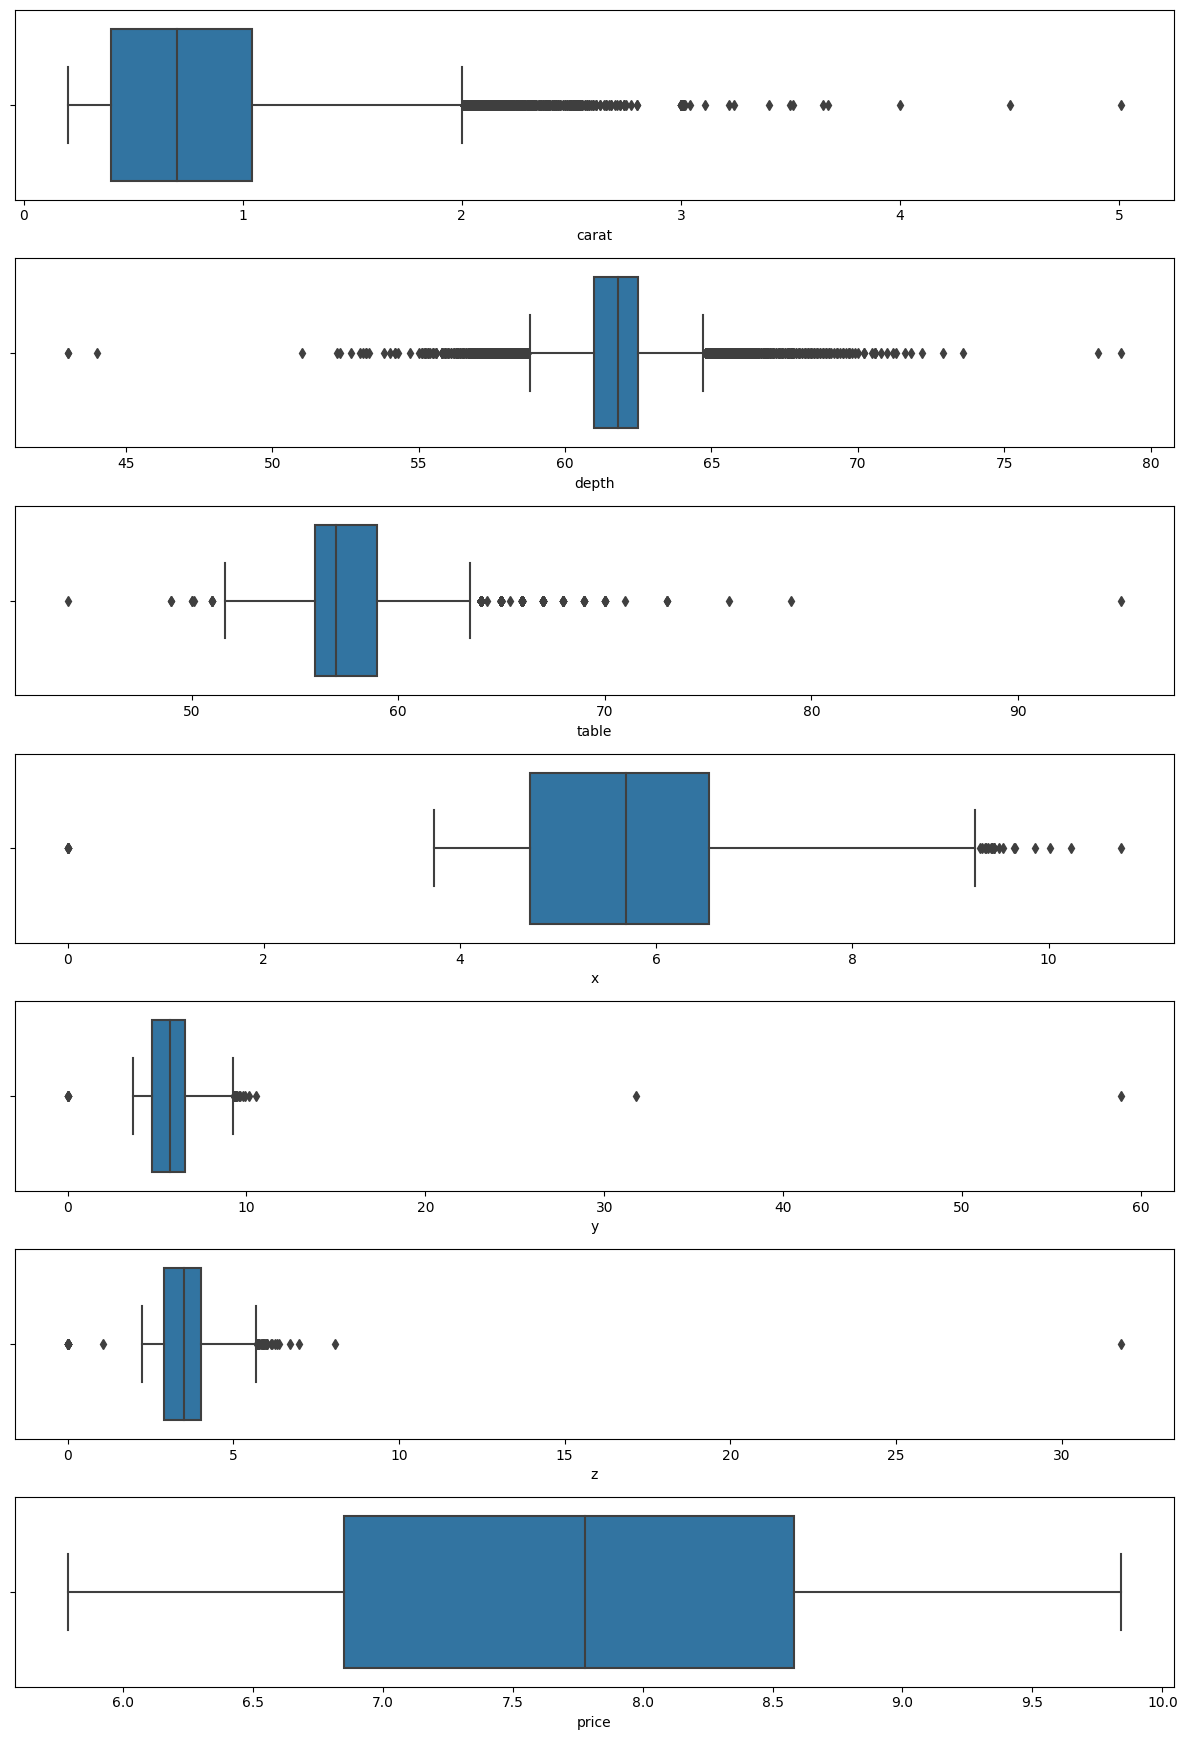

In [34]:
sp.chart_boxplot(df)

hay outliers en las columnas de `carat`, `depth` y `table`.

# normalización

original ShapiroResult(statistic=0.9629325270652771, pvalue=0.0) 
 log: ShapiroResult(statistic=0.9636465311050415, pvalue=0.0) 
 sqrt ShapiroResult(statistic=0.9639406800270081, pvalue=0.0) 
 bc: ShapiroResult(statistic=0.9639595150947571, pvalue=0.0)


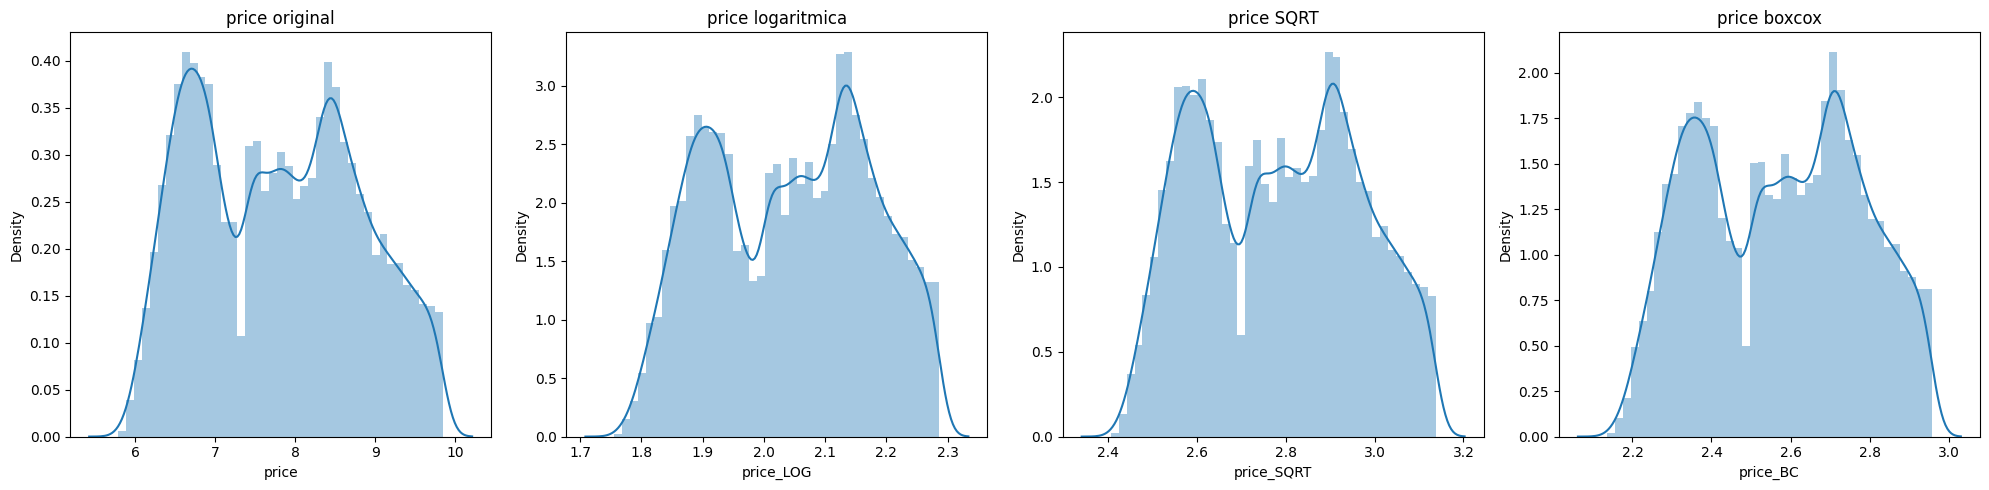

In [35]:
df_norm = sp.normalizacion(df, 'price')

viendo los resultados del test de shapiro, vemos que los datos no son normales en esta aproximación.

# estandarización

In [36]:
columns_estandar = df.select_dtypes(include = np.number).drop(['id', 'price'], axis = 1).columns
df_norm[columns_estandar] = sp.estandarizacion(df, columns_estandar, 'mediana')
df_norm.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,price_LOG,price_SQRT,price_BC
0,0,-0.625000,Premium,D,SI2,0.400000,0.333333,-0.754098,-0.780220,-0.750000,6.353,-0.899951,-0.861672,-0.883216
1,1,0.484375,Ideal,E,VVS2,0.600000,-0.333333,0.398907,0.417582,0.464286,9.183,0.736368,0.772962,0.752019
2,2,0.031250,Ideal,F,VS2,0.000000,0.666667,0.010929,0.021978,0.017857,7.983,0.114401,0.115922,0.115071
3,3,0.593750,Very Good,G,SI2,0.933333,0.000000,0.464481,0.439560,0.535714,8.371,0.325184,0.333457,0.328774
4,4,-0.531250,Premium,G,VS1,0.333333,0.666667,-0.650273,-0.631868,-0.625000,6.588,-0.738629,-0.713563,-0.727726


# encoding

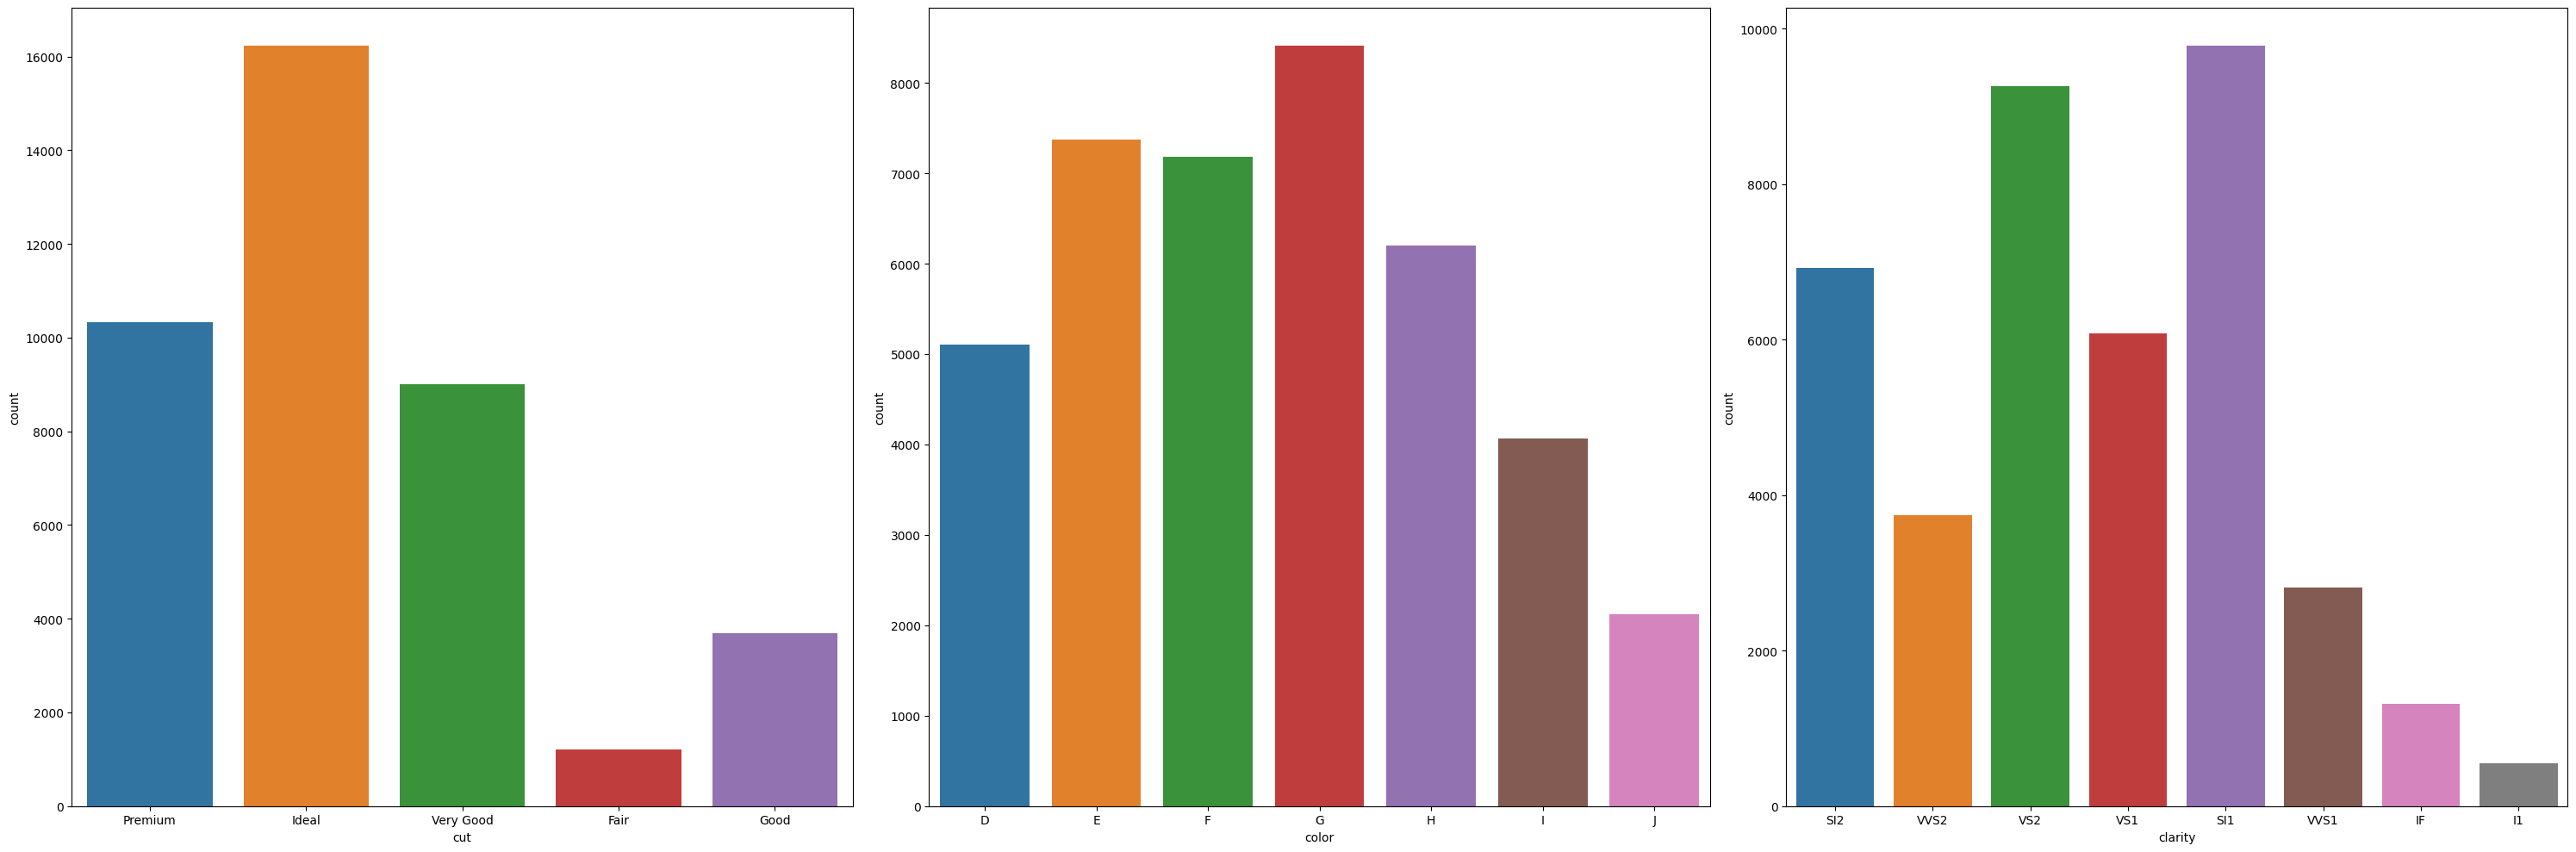

In [37]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

df_cat = df.select_dtypes(include = 'object')#.columns

for i, colum in enumerate(df_cat.columns):
    chart = sns.countplot(
            x = df_cat[colum],
            #hue = df_cat['Offer_Accepted'],
            ax = axes[i])

fig.tight_layout();

mirando las distrribuciones, parece que el dataframe tiene orden.

In [38]:
columnas_cat = df.select_dtypes(include = 'object').columns#.tolist()
sp.encoding(df_norm, columnas_cat.tolist(), 'con orden')
df_norm.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,price_LOG,price_SQRT,price_BC
0,0,-0.625000,3,2,5,0.400000,0.333333,-0.754098,-0.780220,-0.750000,6.353,-0.899951,-0.861672,-0.883216
1,1,0.484375,4,5,3,0.600000,-0.333333,0.398907,0.417582,0.464286,9.183,0.736368,0.772962,0.752019
2,2,0.031250,4,4,6,0.000000,0.666667,0.010929,0.021978,0.017857,7.983,0.114401,0.115922,0.115071
3,3,0.593750,2,6,5,0.933333,0.000000,0.464481,0.439560,0.535714,8.371,0.325184,0.333457,0.328774
4,4,-0.531250,3,6,4,0.333333,0.666667,-0.650273,-0.631868,-0.625000,6.588,-0.738629,-0.713563,-0.727726


# modelo
separamos entre modelo y test

In [39]:
df_norm.drop(['price_LOG','price_SQRT', 'price'], axis = 1, inplace = True)

In [40]:
X = df_norm.drop(['id', 'price_BC'], axis = 1)
y = df_norm[['price_BC']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

## linear regresion

no se puede sacar la linear regression.

## decission tree

In [42]:
y_pred_test, y_pred_train, max_features, max_depth = sp.decission_tree_params(X_train, y_train, X_test, y_test)

In [43]:
print('max features', max_features, 'max depth', max_depth)

max features 3.0 max depth 37


In [44]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = sp.metricas(y_test, y_train, y_pred_test, y_pred_train, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.050567,0.005736,0.075738,0.982952,test,Decission Tree I
1,0.000104,0.000006,0.002354,0.999984,train,Decission Tree I


In [45]:
best_estimator, param = sp.modelos_grid_search(X_train, y_train, X_test, y_test, max_depth, max_features, 'DecisionTree')

2023-03-27 20:51:27.229100


In [ ]:
best_estimator

In [ ]:
y_pred_test, y_pred_train = sp.modelo_prediccion(X_train, y_train, X_test, y_test, max_depth = 23, max_features = 3, min_samples_split = 10, min_samples_leaf = 25, input = 'DecisionTree')

In [ ]:
# sacamos las métricas para ver si hay overfitting

dt_results2 = sp.metricas(y_test, y_train, y_pred_test, y_pred_train, "Decission Tree II")
df_all_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_all_results

## random forest

In [ ]:
best_estimator, param = sp.modelos_grid_search(X_train, y_train, X_test, y_test, max_depth = 29, max_features = 3, input = 'RandomForest')

In [ ]:
best_estimator

In [ ]:
y_pred_test, y_pred_train = sp.modelo_prediccion(X_train, y_train, X_test, y_test, max_depth = 37, max_features = 3, min_samples_split = 10, min_samples_leaf = 25, input = 'DecisionTree')

In [ ]:
# sacamos las métricas para ver si hay overfitting

rf_results = sp.metricas(y_test, y_train, y_pred_test, y_pred_train, "Random Forest")
df_all_results = pd.concat([df_all_results, rf_results], axis = 0)
df_all_results

## knn

## gradient booster